## Rahul Netkar
## Data Science intern

Task 1: Iris Flowers Classification ML Project

Dataset link: http://archive.ics.uci.edu/ml/datasets/Iris

# Importing packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# Load the data

In [3]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Species'] 
df = pd.read_csv('iris.data', names=columns)

In [4]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 5)

In [6]:
df.isnull()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [10]:
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualize the whole dataset

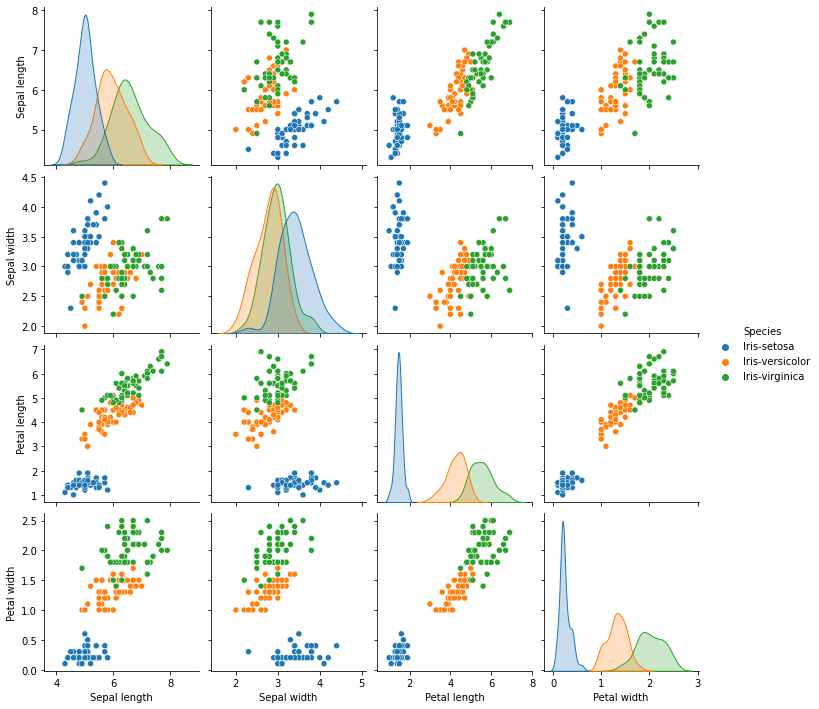

In [12]:
sns.pairplot(df, hue='Species')

# Data preprocessing/correlational matrix

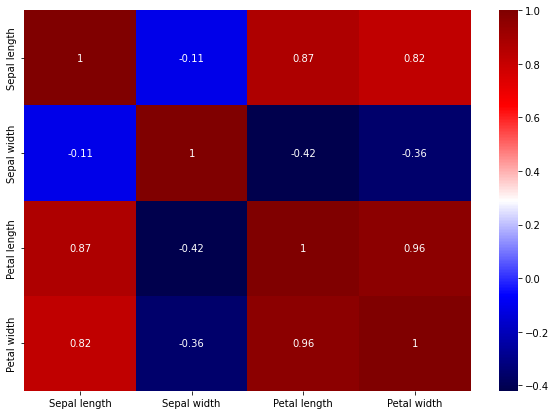

In [13]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(),annot=True,cmap='seismic')
plt.show()

### Separate features and target 

In [7]:
data = df.values
X = data[:,0:4]
Y = data[:,4]

### Calculate average of each features for all classes

In [8]:
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

### Plot the average

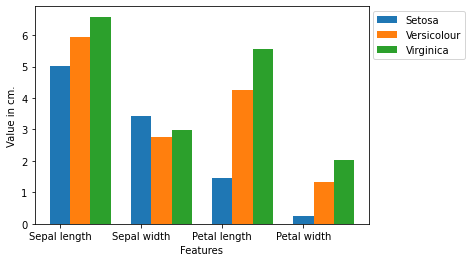

In [16]:

plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

# Model Training
> Split the data to train and test dataset.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [10]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

# Model Evaluation

In [11]:
predictions = svm.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9111111111111111

### Classification report

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.69      1.00      0.82         9
 Iris-virginica       1.00      0.80      0.89        20

       accuracy                           0.91        45
      macro avg       0.90      0.93      0.90        45
   weighted avg       0.94      0.91      0.91        45



# Testing the model

In [13]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
prediction = svm.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']


## The model is predicting correctly because the setosa is shortest and virginica is the longest and versicolor is in between these two as we saw this in above graph. 

### Save the model using pickle

In [25]:
import pickle
with open('Model.pickle', 'wb') as f:
    pickle.dump(svm, f)

### load the model

In [26]:
with open('Model.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(X_new)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)